# Work process

## Set a measurable goal

## EDA (Exploratory Data Analysis)

### Initial conclusion

## Preprocessing

## Modeling

# Application

## EDA

### Shape Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv("train.csv")

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

<Axes: >

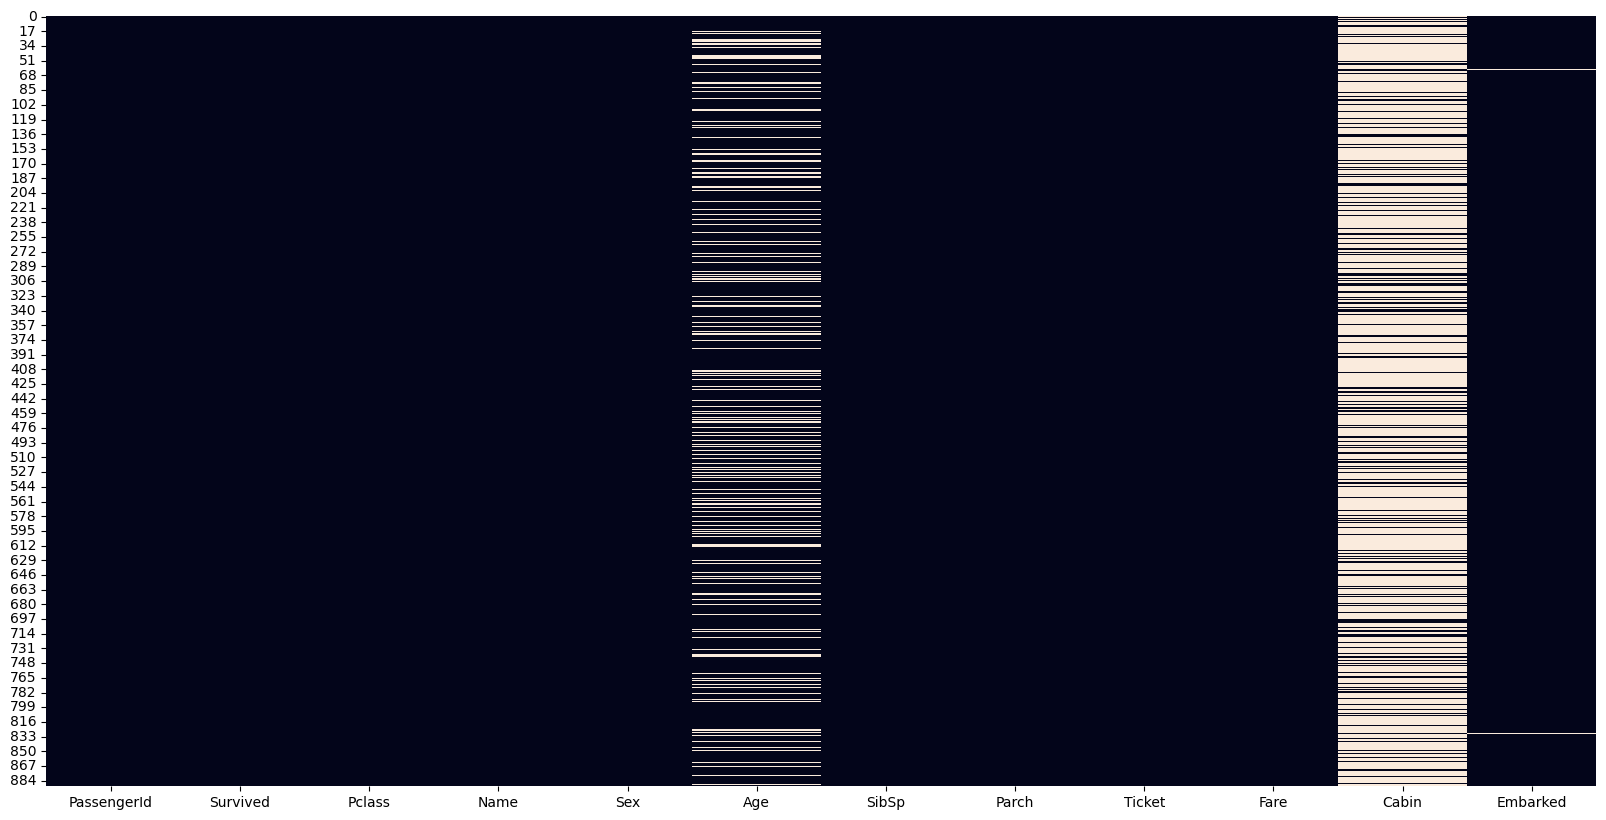

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False)

In [15]:
(df.isna().sum()/df.shape[0]).sort_values()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
Age            0.198653
Cabin          0.771044
dtype: float64

### Background analysis

#### 1. Initial Visualization - Eliminating Empty Columns

In [16]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.75]]

In [17]:
df.shape

(891, 11)

<Axes: >

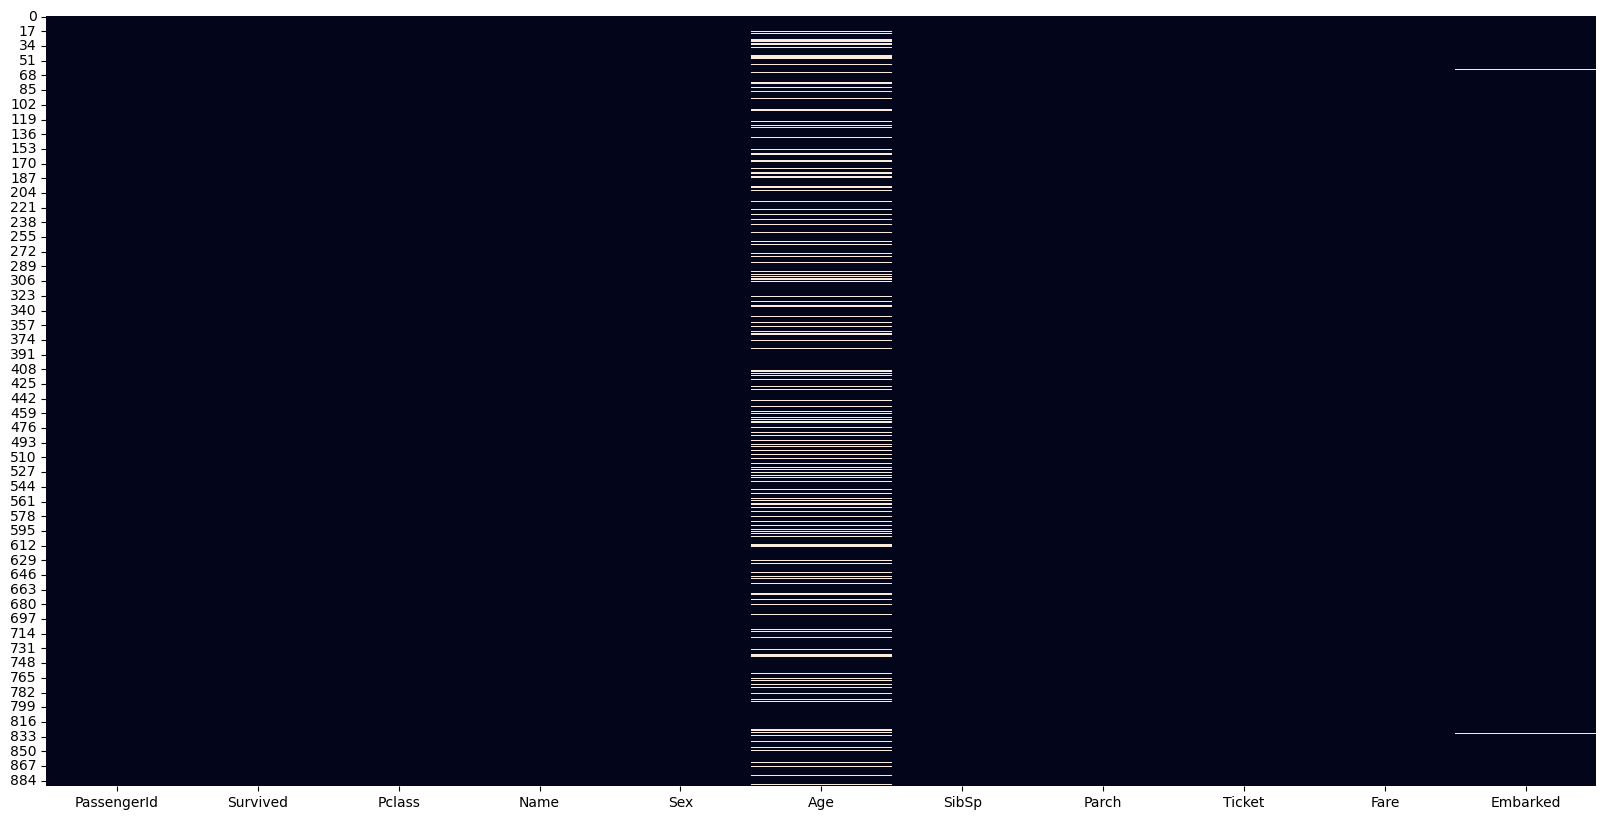

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [28]:
df = df.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

#### Examining the target column

#### Review of quantitative and qualitative data

In [30]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

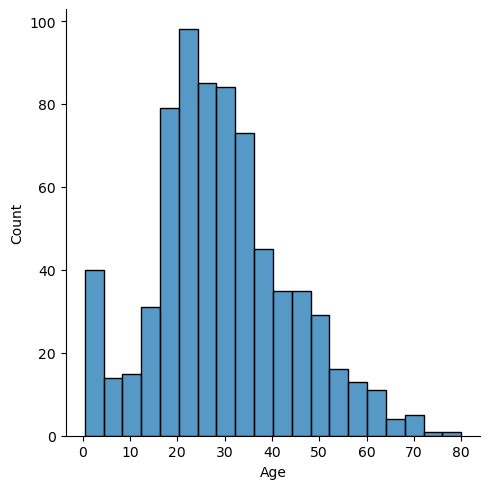

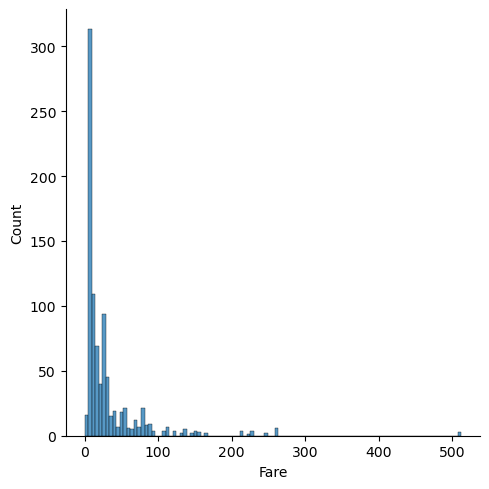

In [31]:
for col in df.select_dtypes('float'):
    sns.displot(df[col])

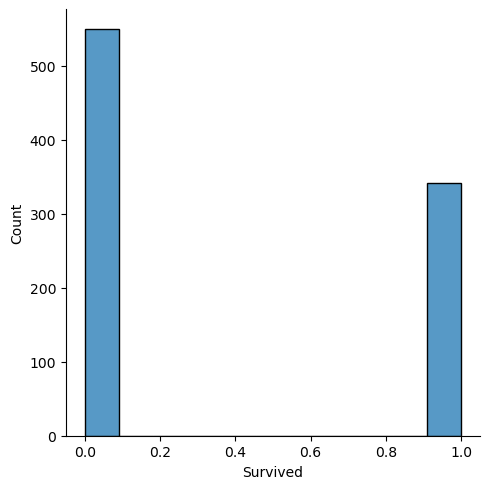

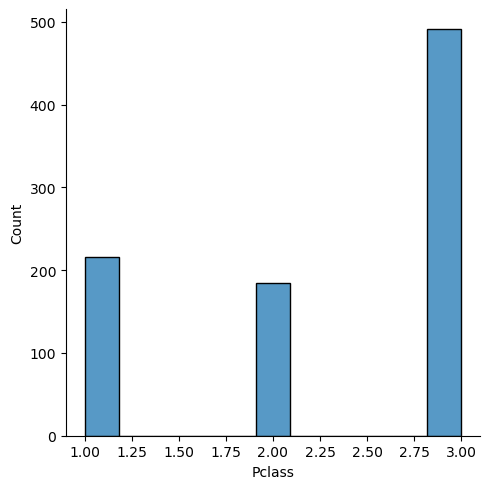

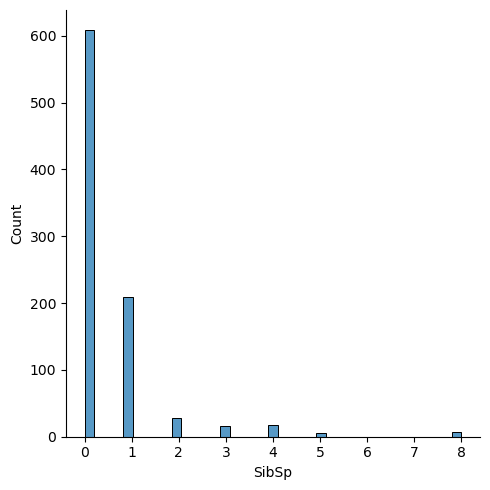

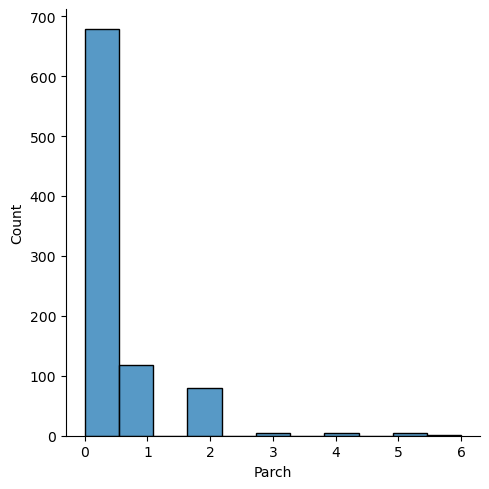

In [32]:
for col in df.select_dtypes('int'):
    sns.displot(df[col])

In [33]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [34]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

Sex----------------------------------------------- ['male' 'female']
Cabin--------------------------------------------- [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84'

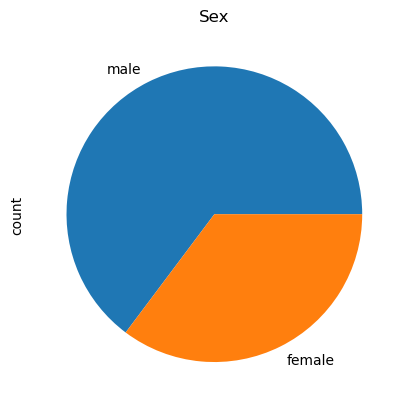

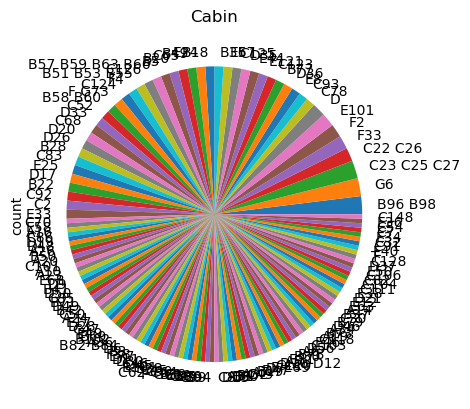

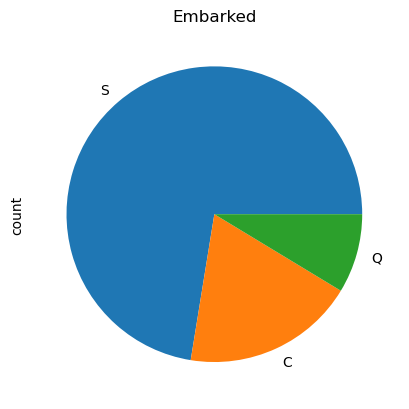

In [35]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

### Relation Target/Values

In [77]:
survived_df = df[df['Survived'] == 1]
deceased_df = df[df['Survived'] == 0]

#### Target / Pclass

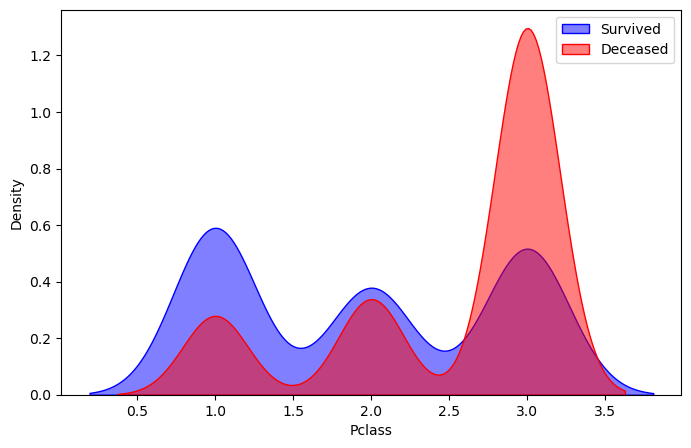

In [71]:
plt.figure(figsize=(8, 5))
sns.kdeplot(positive_df['Pclass'], label= 'Survived', fill=True, alpha=0.5, color='blue')
sns.kdeplot(negative_df['Pclass'], label= 'Deceased', fill=True, alpha=0.5, color='red')
plt.legend()
plt.show()

#### Target / Sex

<Axes: xlabel='Sex', ylabel='Survived'>

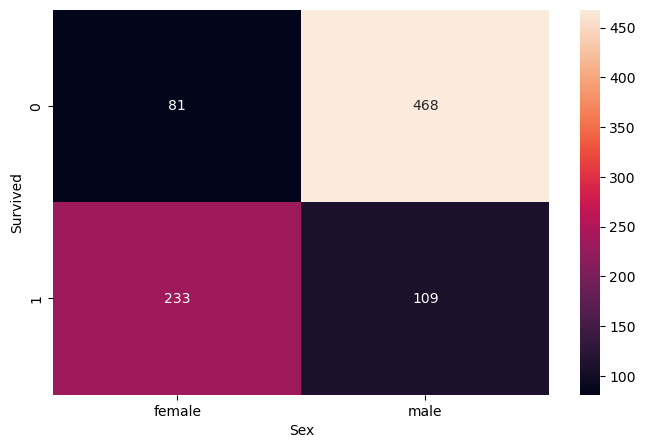

In [76]:
plt.figure(figsize=(8, 5))
sns.heatmap(pd.crosstab(df['Survived'], df['Sex']), annot=True, fmt='d')

#### Target / Age

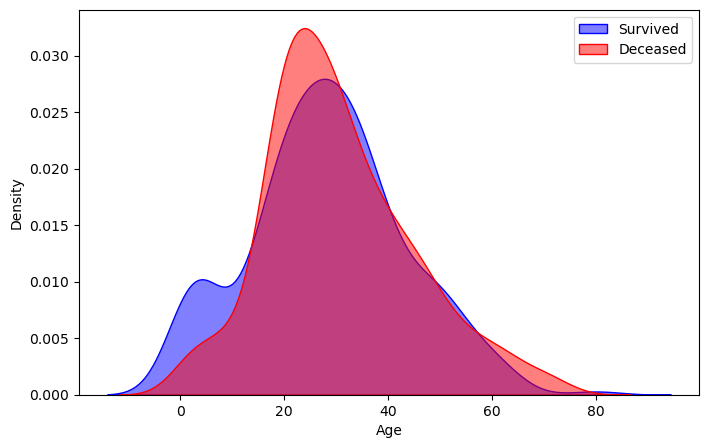

In [78]:
plt.figure(figsize=(8, 5))
sns.kdeplot(positive_df['Age'], label= 'Survived', fill=True, alpha=0.5, color='blue')
sns.kdeplot(negative_df['Age'], label= 'Deceased', fill=True, alpha=0.5, color='red')
plt.legend()
plt.show()

#### Target / SibSp

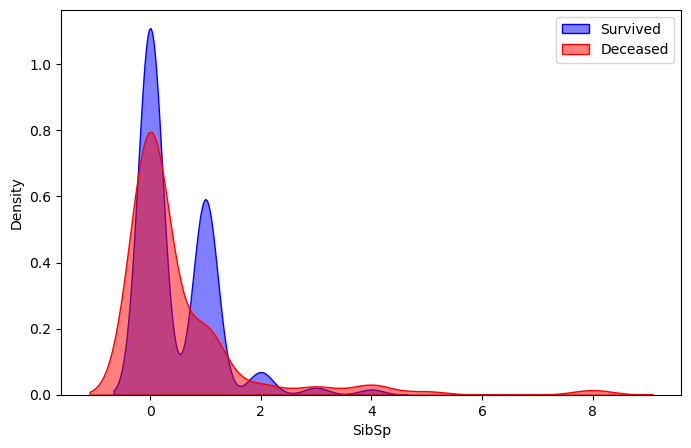

In [80]:
plt.figure(figsize=(8, 5))
sns.kdeplot(positive_df['SibSp'], label= 'Survived', fill=True, alpha=0.5, color='blue')
sns.kdeplot(negative_df['SibSp'], label= 'Deceased', fill=True, alpha=0.5, color='red')
plt.legend()
plt.show()

#### Target / Parch

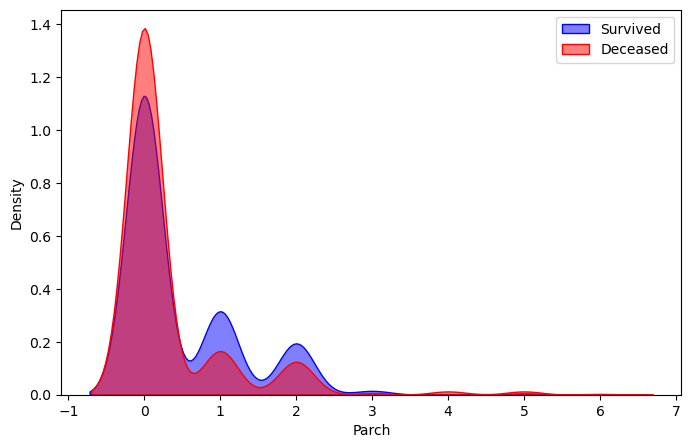

In [81]:
plt.figure(figsize=(8, 5))
sns.kdeplot(positive_df['Parch'], label= 'Survived', fill=True, alpha=0.5, color='blue')
sns.kdeplot(negative_df['Parch'], label= 'Deceased', fill=True, alpha=0.5, color='red')
plt.legend()
plt.show()

#### Target / Fare

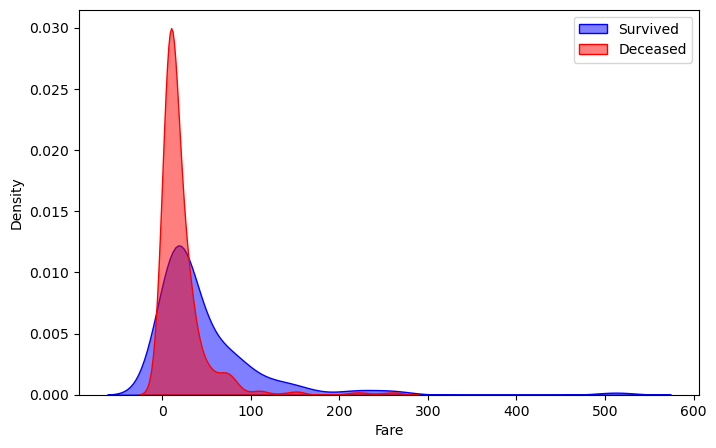

In [94]:
plt.figure(figsize=(8, 5))
sns.kdeplot(positive_df['Fare'], label= 'Survived', fill=True, alpha=0.5, color='blue')
sns.kdeplot(negative_df['Fare'], label= 'Deceased', fill=True, alpha=0.5, color='red')
plt.legend()
plt.show()

#### Target / Cabin

In [105]:
df['Deck'] = df['Cabin'].astype(str).str[0]

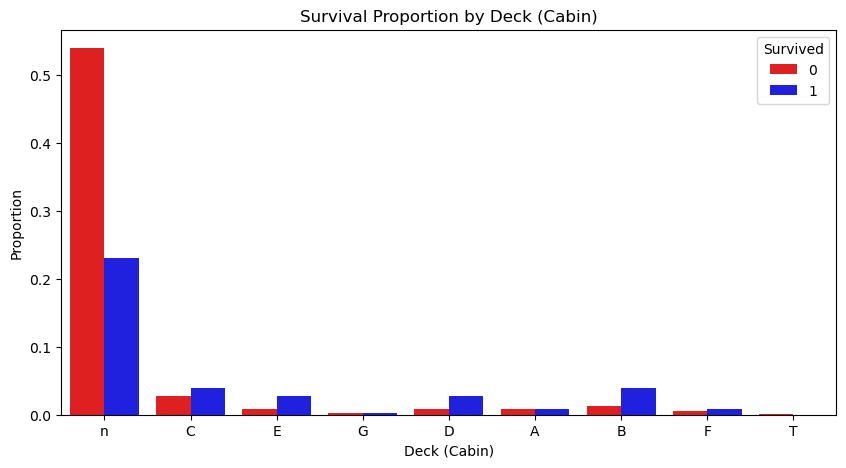

In [119]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Deck', hue='Survived', stat='proportion', palette={0: "red", 1: "blue"})
plt.title("Survival Proportion by Deck (Cabin)")
plt.xlabel("Deck (Cabin)")
plt.ylabel("Proportion")
plt.show()

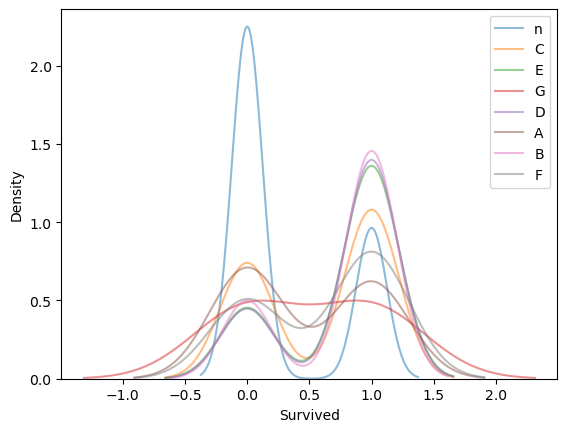

In [124]:
plt.figure()
for cat in df['Deck'].unique():
    sns.kdeplot(df[df['Deck']==cat]['Survived'], label=cat,alpha=0.5,warn_singular=False)
plt.legend()

#### Target / Embarked

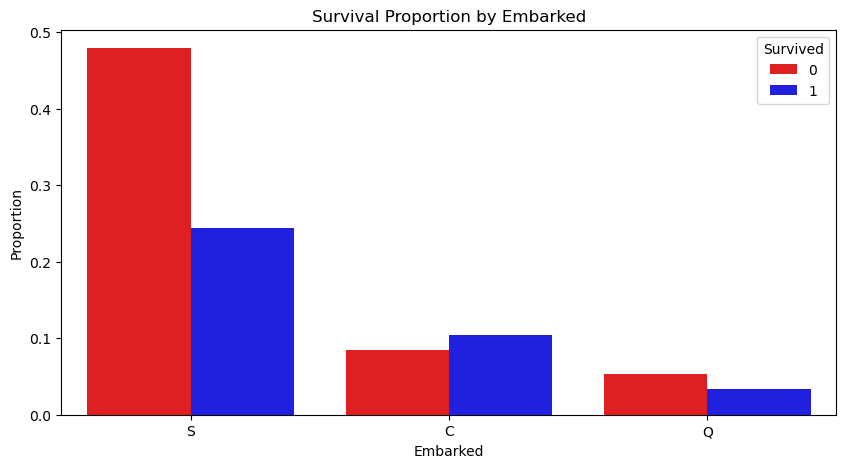

In [118]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', hue='Survived', stat='proportion', palette={0: "red", 1: "blue"})
plt.title("Survival Proportion by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Proportion")plt.figure()
for cat in df['Embarked'].unique():
    sns.kdeplot(df[df['Embarked']==cat]['Survived'], label=cat,alpha=0.5)
plt.legend()
plt.show()

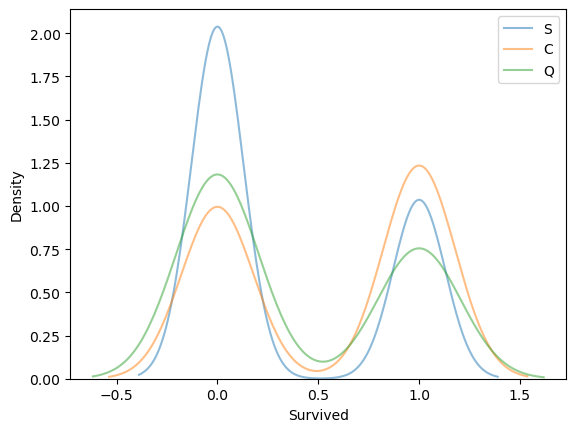

In [122]:
plt.figure()
for cat in df['Embarked'].unique():
    sns.kdeplot(df[df['Embarked']==cat]['Survived'], label=cat,alpha=0.5)
plt.legend()

#### SibSp / Parse

In [84]:
df['FamilySize'] = df['SibSp'] + df['Parch']

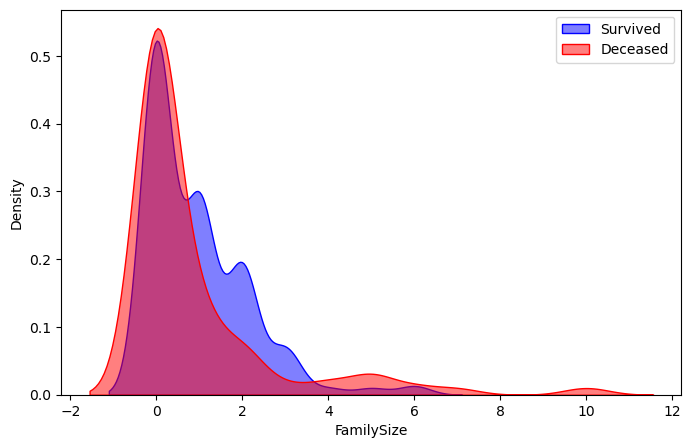

In [93]:
plt.figure(figsize=(8, 5))
sns.kdeplot(survived_df['FamilySize'], label= 'Survived', fill=True, alpha=0.5, color='blue')
sns.kdeplot(deceased_df['FamilySize'], label= 'Deceased', fill=True, alpha=0.5, color='red')
plt.legend()
plt.show()